In [109]:
import pandas as pd

# Importing the CSV file
df = pd.read_csv('USGS.csv')

print (df)

                            time   latitude  longitude    depth   mag magType  \
0       2023-12-31T23:18:09.731Z  -4.259000   143.5602  133.548  4.20      mb   
1       2023-12-31T22:52:31.316Z  -2.688600   141.4208   10.000  4.20      mb   
2       2023-12-31T22:48:19.016Z -17.506500  -178.3327  540.654  4.40      mb   
3       2023-12-31T22:13:49.174Z  13.952600   144.5892  193.928  4.20      mb   
4       2023-12-31T21:42:27.330Z  18.064167   -66.8160   14.760  2.56      md   
...                          ...        ...        ...      ...   ...     ...   
145090  2019-01-01T02:07:28.737Z  55.784700  -149.0372    1.700  2.80      ml   
145091  2019-01-01T02:04:02.950Z   5.887300   127.4672   35.000  4.50      mb   
145092  2019-01-01T01:03:16.820Z  37.176800    20.6873   10.000  4.30      mb   
145093  2019-01-01T00:21:25.050Z -34.903000  -111.5903   10.000  4.80      mb   
145094  2019-01-01T00:04:05.950Z -14.951000   167.2922   40.140  4.80      mb   

         nst    gap    dmin

In [110]:
# List of columns to keep
columns_to_keep = ['time', 'latitude', 'longitude', 'place', 'mag']
df = df[columns_to_keep]

# Dictionary to map old column names to new column names
column_mapping = {
    'time': 'Time',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'place': 'Place',
    'mag': 'Magnitude',
}
# Rename columns
df = df.rename(columns=column_mapping)


# Define a function to extract the country name and delete the row if there's no comma
def extract_country_and_delete(value):
    parts = value.split(', ')
    if len(parts) > 1:
        return parts[1]
    else:
        return None  # Return None to indicate deletion

# Apply the function to all rows of the 'place' column
df['Place'] = df['Place'].apply(extract_country_and_delete)

# Drop rows where the 'place' column is None (i.e., where there was no comma)
df.dropna(subset=['Place'], inplace=True)

print(df)

                            Time   Latitude  Longitude             Place  \
0       2023-12-31T23:18:09.731Z  -4.259000   143.5602  Papua New Guinea   
1       2023-12-31T22:52:31.316Z  -2.688600   141.4208  Papua New Guinea   
2       2023-12-31T22:48:19.016Z -17.506500  -178.3327              Fiji   
3       2023-12-31T22:13:49.174Z  13.952600   144.5892              Guam   
4       2023-12-31T21:42:27.330Z  18.064167   -66.8160       Puerto Rico   
...                          ...        ...        ...               ...   
145088  2019-01-01T02:10:34.710Z  -5.692500   142.2502  Papua New Guinea   
145089  2019-01-01T02:09:36.160Z  39.422800    40.5636            Turkey   
145090  2019-01-01T02:07:28.737Z  55.784700  -149.0372            Alaska   
145091  2019-01-01T02:04:02.950Z   5.887300   127.4672       Philippines   
145092  2019-01-01T01:03:16.820Z  37.176800    20.6873            Greece   

        Magnitude  
0            4.20  
1            4.20  
2            4.40  
3      

In [111]:
# Filter the rows where the Place is 'Japan'
df = df[df['Place'] == 'Japan']

# Optionally, you can save this filtered DataFrame to a new CSV file
df.to_csv('Japan_data.csv', index=False)

# Display the filtered DataFrame
print(df)
num_rows_original = len(df)

                            Time  Latitude  Longitude  Place  Magnitude
26      2023-12-31T14:37:38.234Z   28.1762   130.6658  Japan        4.8
75      2023-12-30T22:39:19.128Z   40.0474   142.1067  Japan        4.3
140     2023-12-30T06:07:30.619Z   42.8445   142.4671  Japan        4.5
262     2023-12-28T14:49:23.436Z   27.8668   128.9747  Japan        4.5
272     2023-12-28T13:16:53.788Z   40.5601   142.4133  Japan        4.8
...                          ...       ...        ...    ...        ...
144852  2019-01-04T22:05:07.080Z   32.8198   140.1248  Japan        4.3
144926  2019-01-03T15:34:35.920Z   25.3139   124.1513  Japan        4.7
144939  2019-01-03T09:10:28.440Z   33.0514   130.4705  Japan        4.7
144991  2019-01-02T15:11:16.070Z   39.4417   143.6408  Japan        4.5
145034  2019-01-01T22:05:38.960Z   35.6831   140.2344  Japan        4.4

[3976 rows x 5 columns]


In [112]:
# Understanding the data-types of our data
print(df.dtypes)

Time          object
Latitude     float64
Longitude    float64
Place         object
Magnitude    float64
dtype: object


In [113]:
# Converting the 'Time' values to date-time format
df['Time'] = pd.to_datetime(df['Time'])

# Create a new column for month
df['Month'] = df['Time'].dt.month

# Create a new column for year
df['Year'] = df['Time'].dt.year

print(df.dtypes)

Time         datetime64[ns, UTC]
Latitude                 float64
Longitude                float64
Place                     object
Magnitude                float64
Month                      int32
Year                       int32
dtype: object


In [114]:
# Preprocessing the data

# Removing the rows with missing values
df.dropna

# Rounding off the data to to given decimal places in different columns
column_name1 = 'Latitude'
column_name2 = 'Longitude'
column_name3 = 'Magnitude'
df[column_name1] = df[column_name1].round(3)
df[column_name2] = df[column_name2].round(3)
df[column_name3] = df[column_name3].round(2)


# Handling Outliers
columns_to_check = ['Magnitude']

# Loop through each column
for column in columns_to_check:
    # Calculate mean and standard deviation
    avg = df[column].mean()
    std_dev = df[column].std()

    # Calculate the lower and upper bounds for outliers
    lower_bound = avg - 3 * std_dev
    upper_bound = avg + 3 * std_dev
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Remove outliers from the DataFrame
    df = df.drop(outliers.index)

# Reset the index to renumber the rows
df.reset_index(drop=True, inplace=True)

num_rows_processed = len(df)
num_rows_deleted = num_rows_original - num_rows_processed

# Statistics about data left after Pre-processing
print("Number of Rows Deleted During Pre-processing:", num_rows_deleted)
print("Number of Rows Available In The Pre-processed Dataset", len(df))

Number of Rows Deleted During Pre-processing: 66
Number of Rows Available In The Pre-processed Dataset 3910


In [115]:
df = df.drop(columns=['Place','Time'])
df2 = df.copy()
df.head()

,Latitude,Longitude,Magnitude,Month,Year
0,28.176,130.666,4.8,12,2023
1,40.047,142.107,4.3,12,2023
2,42.844,142.467,4.5,12,2023
3,27.867,128.975,4.5,12,2023
4,40.560,142.413,4.8,12,2023


In [116]:
''' SMA = Simple Moving Avg. = Normal avg. of the window size = Works only on the actual data (No involvement of the forecasted data)
        F(t) = Avg.(past n actual-values)
    EMA = Exponential Moving Avg. = Gives More Weightage to the the present data than the past data, so more responsive   
        F(t) = ß*A(t-1) + (1-ß)*F(t-1)
        ß = Decides how much past data to use for forecasting
        1/(1-ß) = No. of days for which past data has been considered = Greater the value of ß, more will be the no. of past-values used for forecasting.
'''    

' SMA = Simple Moving Avg. = Normal avg. of the window size = Works only on the actual data (No involvement of the forecasted data)\n        F(t) = Avg.(past n actual-values)\n    EMA = Exponential Moving Avg. = Gives More Weightage to the the present data than the past data, so more responsive   \n        F(t) = ß*A(t-1) + (1-ß)*F(t-1)\n        ß = Decides how much past data to use for forecasting\n        1/(1-ß) = No. of days for which past data has been considered = Greater the value of ß, more will be the no. of past-values used for forecasting.\n'

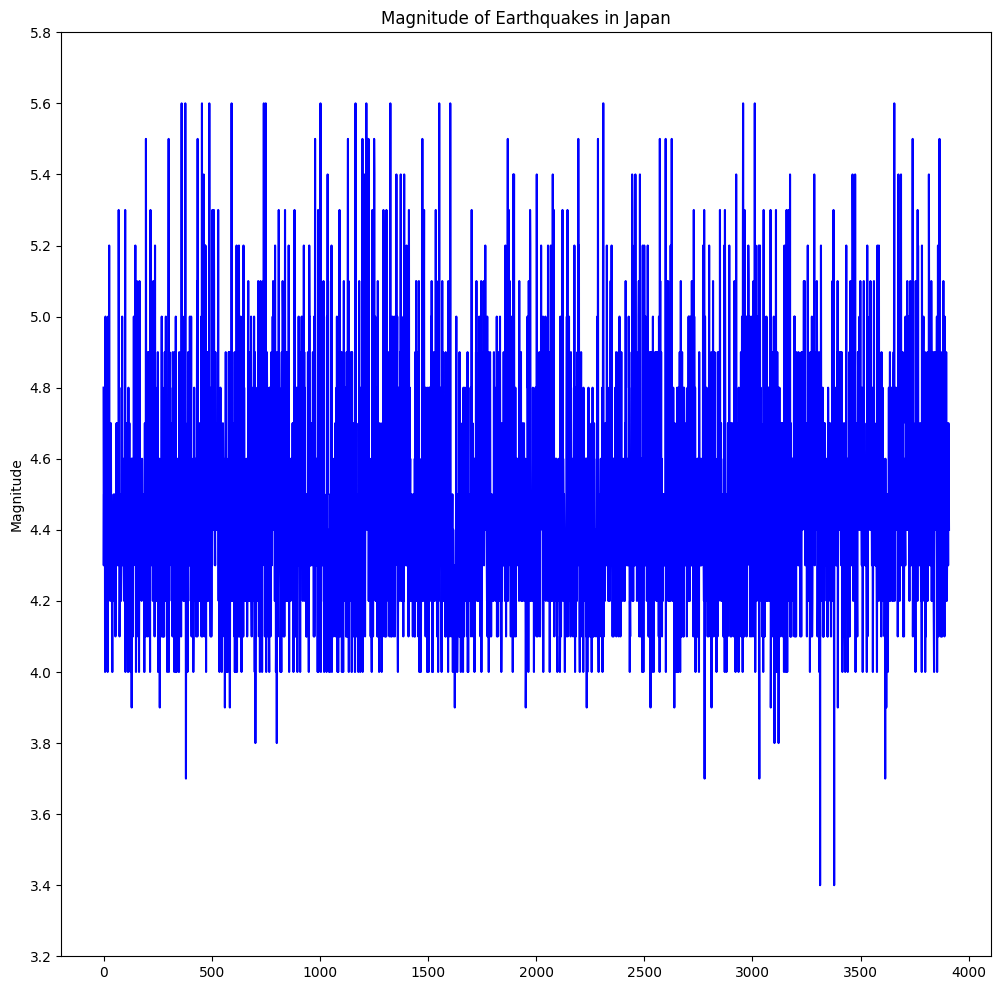

In [117]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 12))

# Plot Magnitude
ax.plot(df.index, df['Magnitude'], color='b')
ax.set_ylabel('Magnitude')
ax.set_title('Magnitude of Earthquakes in Japan')

# Set y-ticks for Magnitude from 3.2 to 6.0 with a step of 0.2
magnitude_ticks = np.arange(3.2, 6.0, 0.2)
ax.set_yticks(magnitude_ticks)

# Display the plot
plt.show()

In [118]:
# Window: Size of the moving window.
# min_periods: Minimum number of observations in window required to have a value;

df['5_SMA_Magnitude'] = df['Magnitude'].rolling(window = 5, min_periods = 1).mean() # create 5 days simple moving average column
df['10_SMA_Magnitude'] = df['Magnitude'].rolling(window = 10, min_periods = 1).mean() # create 10 days simple moving average column
df['30_SMA_Magnitude'] = df['Magnitude'].rolling(window = 30, min_periods = 1).mean() # create 30 days simple moving average column
df['50_SMA_Magnitude'] = df['Magnitude'].rolling(window = 50, min_periods = 1).mean() # create 50 days simple moving average column

df.head()

,Latitude,Longitude,Magnitude,Month,Year,5_SMA_Magnitude,10_SMA_Magnitude,30_SMA_Magnitude,50_SMA_Magnitude
0,28.176,130.666,4.8,12,2023,4.800000,4.800000,4.800000,4.800000
1,40.047,142.107,4.3,12,2023,4.550000,4.550000,4.550000,4.550000
2,42.844,142.467,4.5,12,2023,4.533333,4.533333,4.533333,4.533333
3,27.867,128.975,4.5,12,2023,4.525000,4.525000,4.525000,4.525000
4,40.560,142.413,4.8,12,2023,4.580000,4.580000,4.580000,4.580000


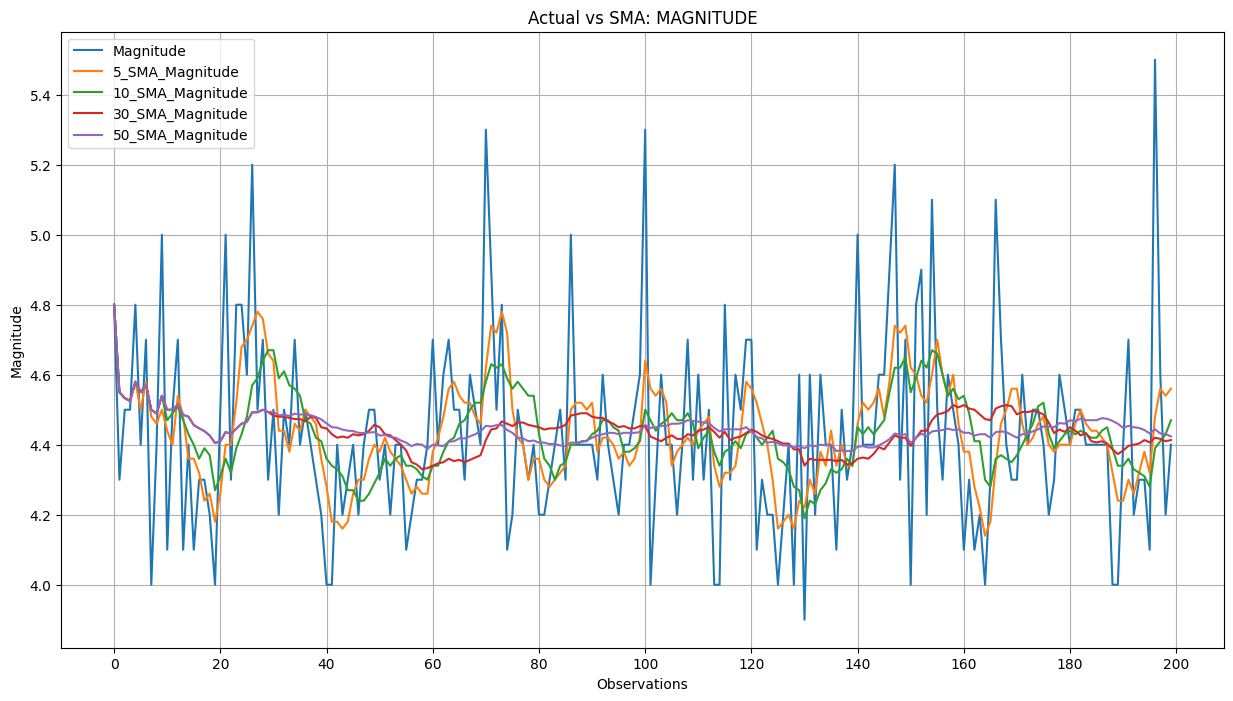

In [119]:
fig, ax = plt.subplots(figsize=(15, 8))
df['Magnitude'][:200].plot(figsize = (15, 8))
df['5_SMA_Magnitude'][:200].plot(figsize = (15, 8))
df['10_SMA_Magnitude'][:200].plot(figsize = (15, 8))
df['30_SMA_Magnitude'][:200].plot(figsize = (15, 8))
df['50_SMA_Magnitude'][:200].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Magnitude")
plt.xlabel("Observations")
plt.title('Actual vs SMA: MAGNITUDE')

# Set xticks at regular intervals, e.g., every 10 observations
xticks = df.index[:220:20]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

plt.legend()
plt.show()

In [120]:
df['5_EMA_Magnitude']=df['Magnitude'].ewm(span = 5, adjust = False).mean()
df['10_EMA_Magnitude']=df['Magnitude'].ewm(span = 10, adjust = False).mean()
df['30_EMA_Magnitude']=df['Magnitude'].ewm(span = 30, adjust = False).mean()
df['50_EMA_Magnitude']=df['Magnitude'].ewm(span = 50, adjust = False).mean()

df.head()

,Latitude,Longitude,Magnitude,Month,Year,5_SMA_Magnitude,10_SMA_Magnitude,30_SMA_Magnitude,50_SMA_Magnitude,5_EMA_Magnitude,10_EMA_Magnitude,30_EMA_Magnitude,50_EMA_Magnitude
0,28.176,130.666,4.8,12,2023,4.800000,4.800000,4.800000,4.800000,4.800000,4.800000,4.800000,4.800000
1,40.047,142.107,4.3,12,2023,4.550000,4.550000,4.550000,4.550000,4.633333,4.709091,4.767742,4.780392
2,42.844,142.467,4.5,12,2023,4.533333,4.533333,4.533333,4.533333,4.588889,4.671074,4.750468,4.769396
3,27.867,128.975,4.5,12,2023,4.525000,4.525000,4.525000,4.525000,4.559259,4.639970,4.734309,4.758832
4,40.560,142.413,4.8,12,2023,4.580000,4.580000,4.580000,4.580000,4.639506,4.669066,4.738547,4.760446


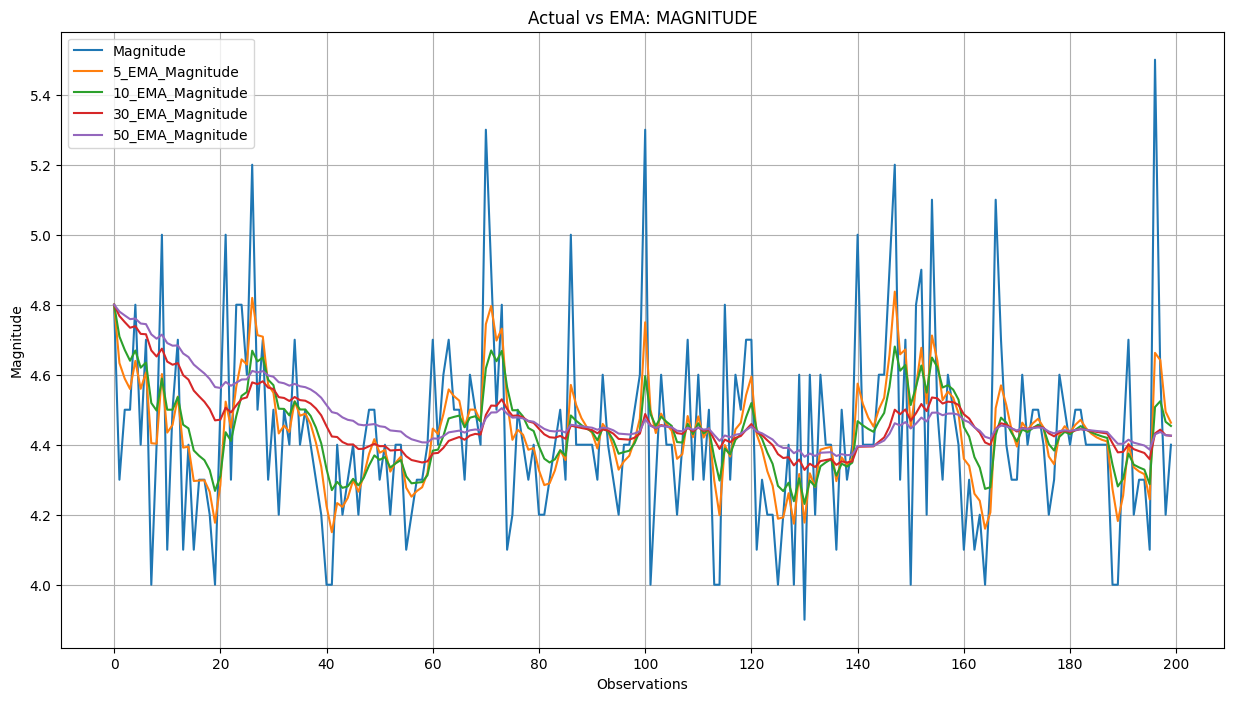

In [121]:
fig, ax = plt.subplots(figsize=(15, 8))
df['Magnitude'][:200].plot(figsize = (15, 8))
df['5_EMA_Magnitude'][:200].plot(figsize = (15, 8))
df['10_EMA_Magnitude'][:200].plot(figsize = (15, 8))
df['30_EMA_Magnitude'][:200].plot(figsize = (15, 8))
df['50_EMA_Magnitude'][:200].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Magnitude")
plt.xlabel("Observations")
plt.title('Actual vs EMA: MAGNITUDE')

# Set xticks at regular intervals, e.g., every 10 observations
xticks = df.index[:220:20]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

plt.legend()
plt.show()

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tabulate import tabulate

sma_columns_magnitude = ['5_SMA_Magnitude', '10_SMA_Magnitude', '30_SMA_Magnitude', '50_SMA_Magnitude']
ema_columns_magnitude = ['5_EMA_Magnitude', '10_EMA_Magnitude', '30_EMA_Magnitude', '50_EMA_Magnitude']

# Metrics
evaluation_metrics = {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Square Evaluation (MSE)', 'Root Mean Square Evaluation (RMSE)']
}

# Define function to calculate metrics for a given set of columns
def calculate_metrics(columns, target):
    for column in columns:
        mae = mean_absolute_error(df[target], df[column])
        mse = mean_squared_error(df[target], df[column])
        rmse = np.sqrt(mse)
        evaluation_metrics[column] = [mae, mse, rmse]

# Calculate evaluation metrics for each set of columns
calculate_metrics(sma_columns_magnitude, 'Magnitude')
calculate_metrics(ema_columns_magnitude, 'Magnitude')

# Create DataFrame from evaluation metrics
evaluation_df = pd.DataFrame(evaluation_metrics)

# Convert DataFrame to tabular format using tabulate
tabulated_data_sma_magnitude = tabulate(evaluation_df[ ['Metric'] + sma_columns_magnitude], headers='keys', tablefmt='fancy_grid')
tabulated_data_ema_magnitude = tabulate(evaluation_df[['Metric'] + ema_columns_magnitude], headers='keys', tablefmt='fancy_grid')

# Display the tabulated data
print(tabulated_data_sma_magnitude)
print(tabulated_data_ema_magnitude)

╒════╤════════════════════════════════════╤═══════════════════╤════════════════════╤════════════════════╤════════════════════╕
│    │ Metric                             │   5_SMA_Magnitude │   10_SMA_Magnitude │   30_SMA_Magnitude │   50_SMA_Magnitude │
╞════╪════════════════════════════════════╪═══════════════════╪════════════════════╪════════════════════╪════════════════════╡
│  0 │ Mean Absolute Error (MAE)          │         0.208831  │          0.223127  │           0.231414 │           0.233348 │
├────┼────────────────────────────────────┼───────────────────┼────────────────────┼────────────────────┼────────────────────┤
│  1 │ Mean Square Evaluation (MSE)       │         0.0744624 │          0.0851273 │           0.091885 │           0.093441 │
├────┼────────────────────────────────────┼───────────────────┼────────────────────┼────────────────────┼────────────────────┤
│  2 │ Root Mean Square Evaluation (RMSE) │         0.272878  │          0.291766  │           0.303125 │      

In [123]:
'''As per the observations from the above valuation metrics, we find 5_EMA to be the better one out of EMA & SMA'''

'As per the observations from the above valuation metrics, we find 5_EMA to be the better one out of EMA & SMA'

In [124]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [125]:
df2.head()

,Latitude,Longitude,Magnitude,Month,Year
0,28.176,130.666,4.8,12,2023
1,40.047,142.107,4.3,12,2023
2,42.844,142.467,4.5,12,2023
3,27.867,128.975,4.5,12,2023
4,40.560,142.413,4.8,12,2023


In [126]:
'''
import seaborn as sns

# Select the columns of interest
subset_df = df2[['Latitude', 'Longitude', 'Magnitude', 'Month']]

# Calculate correlation matrix
corr_matrix = subset_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Heatmap')
plt.show()
'''

'\nimport seaborn as sns\n\n# Select the columns of interest\nsubset_df = df2[[\'Latitude\', \'Longitude\', \'Magnitude\', \'Month\']]\n\n# Calculate correlation matrix\ncorr_matrix = subset_df.corr()\n\n# Plot correlation heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(corr_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f", linewidths=1)\nplt.title(\'Correlation Heatmap\')\nplt.show()\n'

In [127]:
'''
Correlation b/w Lat & Long = +0.94
'''

'\nCorrelation b/w Lat & Long = +0.94\n'

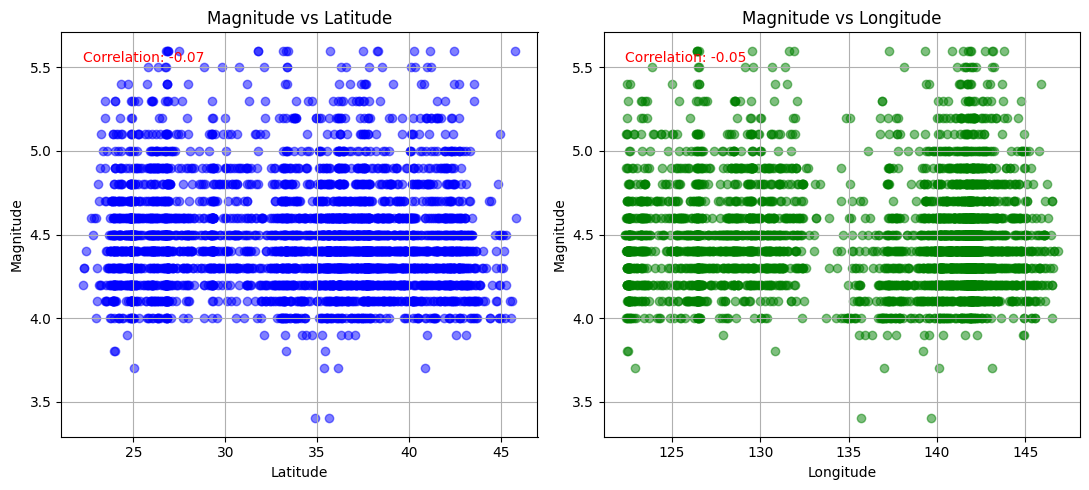

In [128]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# Extract the columns 'Magnitude', 'Latitude', and 'Longitude'
magnitude = df2['Magnitude']
latitude = df2['Latitude']
longitude = df2['Longitude']

# Calculate the correlation coefficients
corr_latitude = magnitude.corr(latitude)
corr_longitude = magnitude.corr(longitude)

# Create scatter plot for Magnitude vs Latitude
axs[0].scatter(latitude, magnitude, color='blue', alpha=0.5)
axs[0].set_title('Magnitude vs Latitude')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Magnitude')
axs[0].grid(True)
axs[0].text(latitude.min(), magnitude.max(), f'Correlation: {corr_latitude:.2f}', fontsize=10, color='red', verticalalignment='top')

# Create scatter plot for Magnitude vs Longitude
axs[1].scatter(longitude, magnitude, color='green', alpha=0.5)
axs[1].set_title('Magnitude vs Longitude')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Magnitude')
axs[1].grid(True)
axs[1].text(longitude.min(), magnitude.max(), f'Correlation: {corr_longitude:.2f}', fontsize=10, color='red', verticalalignment='top')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [129]:
# Checking for the stationarity of the data

# ADF test tells us about the stationarity of the data.
# If the p-value > 0.05, then the data is not stationary.

from statsmodels.tsa.stattools import adfuller

# Perform ADF test for Latitude
adf_result_latitude = adfuller(df2['Latitude'])
print("ADF Statistic for Latitude:", adf_result_latitude[0])
print("p-value for Latitude:", adf_result_latitude[1])

# Perform ADF test for Longitude
adf_result_longitude = adfuller(df2['Longitude'])
print("\nADF Statistic for Longitude:", adf_result_longitude[0])
print("p-value for Longitude:", adf_result_longitude[1])

# Perform ADF test for Magnitude
adf_result_magnitude = adfuller(df2['Magnitude'])
print("\nADF Statistic for Magnitude:", adf_result_magnitude[0])
print("p-value for Magnitude:", adf_result_magnitude[1])

ADF Statistic for Latitude: -13.58219477849085
p-value for Latitude: 2.1133712046939965e-25

ADF Statistic for Longitude: -11.442973958341325
p-value for Longitude: 6.114425109760624e-21

ADF Statistic for Magnitude: -58.17359603463101
p-value for Magnitude: 0.0


In [130]:
'''
p-value relates to the differencing factor. if p-value > 0.05 --> data in not stationary and differencing is needed.
According to this results given above, Lat & Long must be differenced but for Magnitudem d=0.
'''

'\np-value relates to the differencing factor. if p-value > 0.05 --> data in not stationary and differencing is needed.\nAccording to this results given above, Lat & Long must be differenced but for Magnitudem d=0.\n'

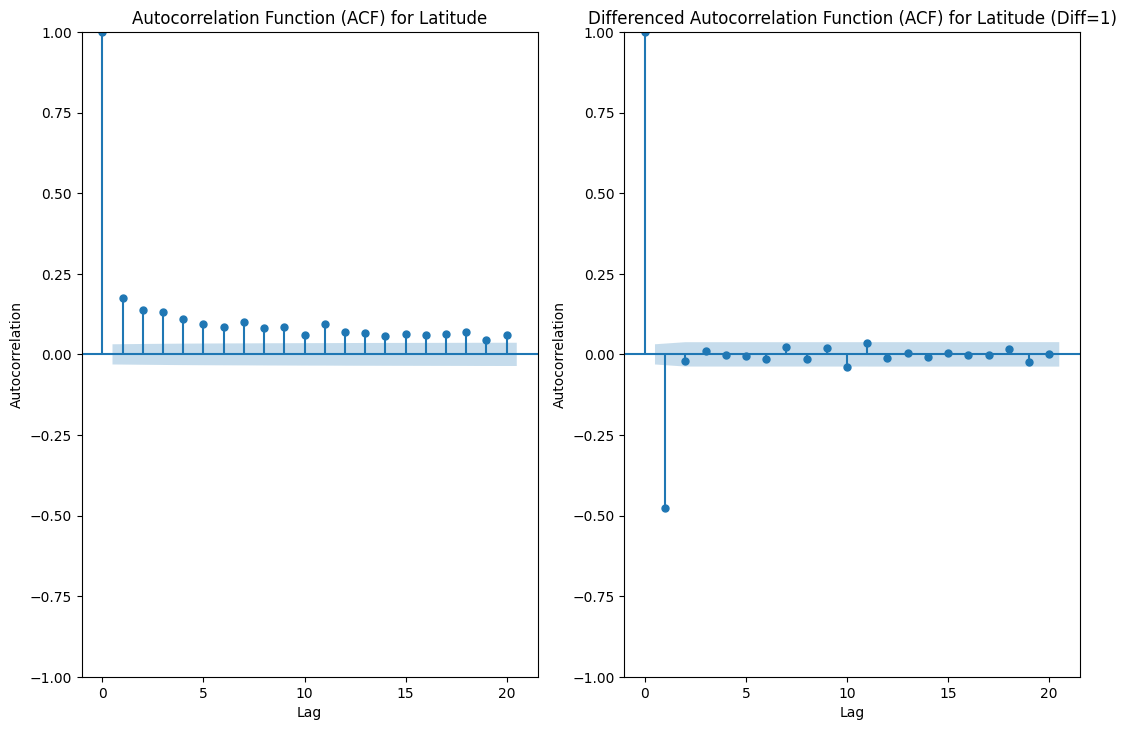

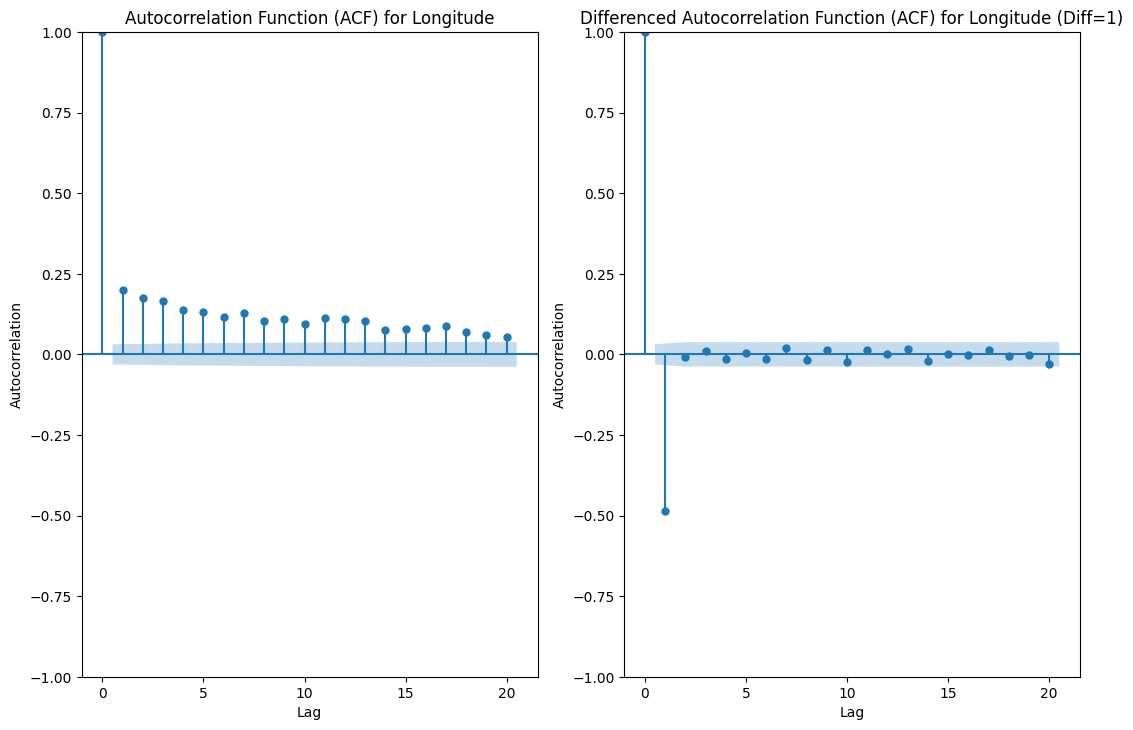

In [131]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function for the original 'Latitude' column
plt.figure(figsize=(11, 14))
plt.subplot(2, 2, 1)
plot_acf(df2['Latitude'], lags=20, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Latitude')

# Plot the differenced autocorrelation function for the 'Latitude' column with difference factor=1
plt.subplot(2, 2, 2)
plot_acf(df2['Latitude'].diff().dropna(), lags=20, ax=plt.gca())
plt.xlabel('Lag')

plt.ylabel('Autocorrelation')
plt.title('Differenced Autocorrelation Function (ACF) for Latitude (Diff=1)')

plt.tight_layout()
plt.show()

# Plot the autocorrelation function for the original 'Longitude' column
plt.figure(figsize=(11, 14))
plt.subplot(2, 2, 1)
plot_acf(df2['Longitude'], lags=20, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Longitude')

# Plot the differenced autocorrelation function for the 'Longitude' column with difference factor=1
plt.subplot(2, 2, 2)
plot_acf(df2['Longitude'].diff().dropna(), lags=20, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Differenced Autocorrelation Function (ACF) for Longitude (Diff=1)')

plt.tight_layout()
plt.show()

In [132]:
'''
'q' = order of Moving Average.
-> Longitude has high autocorrelation & is far from the Preferable Autocorrelation Zone (the significance line). So differencing --> d=1...
-> The value for Latitude can be 7 as its best suited in the Preferable Autocorrelation Zone. --> q=7

-> Longitude has high correlation, so we must use differencing --> d=1...
-> For Longitude, q can be 7. --> q=7
'''

"\n'q' = order of Moving Average.\n-> Longitude has high autocorrelation & is far from the Preferable Autocorrelation Zone (the significance line). So differencing --> d=1...\n-> The value for Latitude can be 7 as its best suited in the Preferable Autocorrelation Zone. --> q=7\n\n-> Longitude has high correlation, so we must use differencing --> d=1...\n-> For Longitude, q can be 7. --> q=7\n"

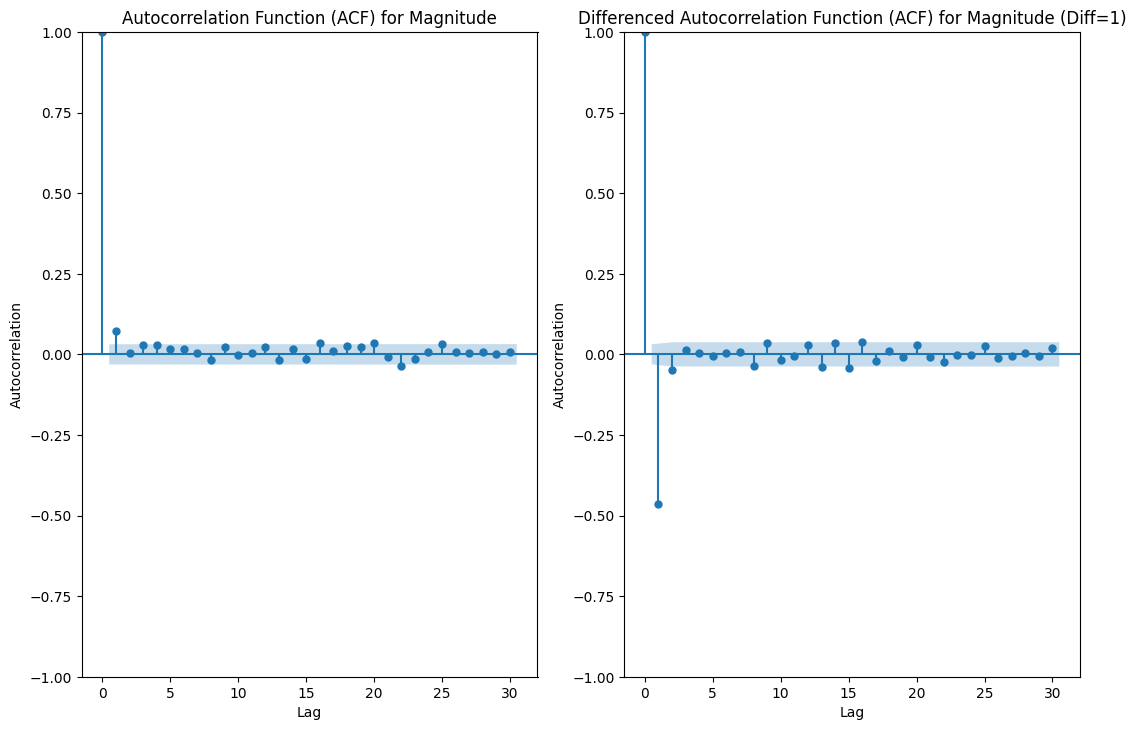

In [133]:
# Plot the autocorrelation function for the original 'Magnitude' column
plt.figure(figsize=(11, 14))
plt.subplot(2, 2, 1)
plot_acf(df2['Magnitude'], lags=30, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Magnitude')

# Plot the differenced autocorrelation function for the 'Magnitude' column with difference factor=1
plt.subplot(2, 2, 2)
plot_acf(df2['Magnitude'].diff().dropna(), lags=30, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Differenced Autocorrelation Function (ACF) for Magnitude (Diff=1)')

plt.tight_layout()
plt.show()

In [134]:
'''
'q' = order of Moving Average. 'd' = differencing factor 
-> Magnitude has low auto-correlation, so no need of differencing --> d=0
-> For Magnitude, q can be 10. --> q=10
'''

"\n'q' = order of Moving Average. 'd' = differencing factor \n-> Magnitude has low auto-correlation, so no need of differencing --> d=0\n-> For Magnitude, q can be 10. --> q=10\n"

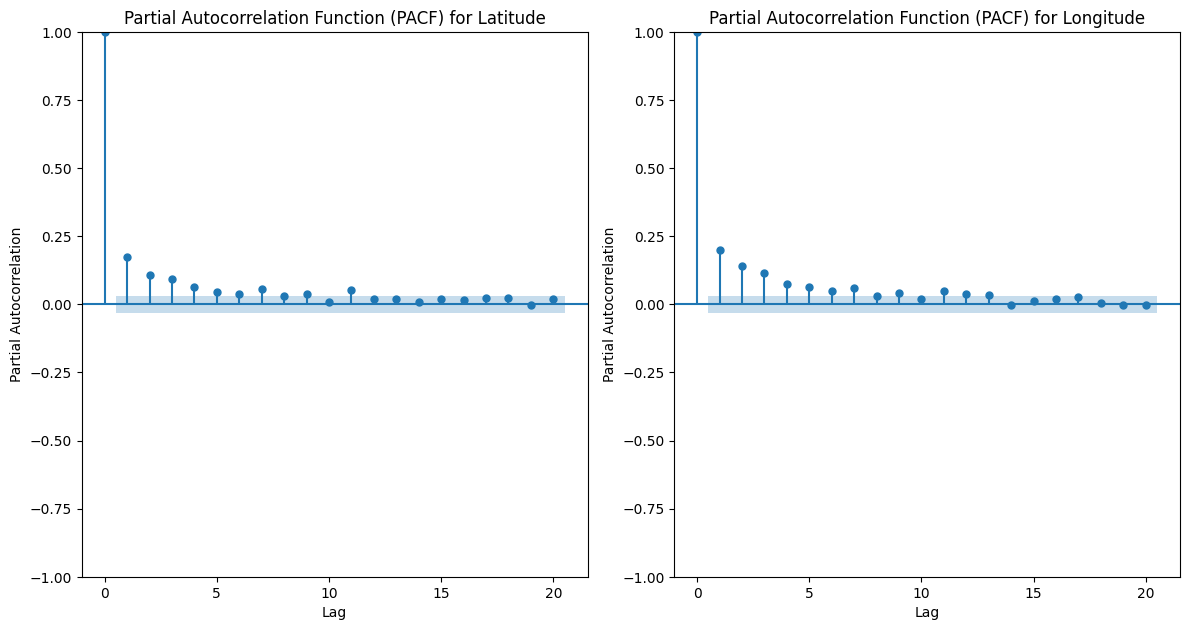

In [135]:
from statsmodels.graphics.tsaplots import plot_pacf

# Define additional keyword arguments for vlines
vlines_kwargs = {'linewidth': 0.05}

# Plot the partial autocorrelation function for the 'Latitude' column
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plot_pacf(df2['Latitude'], lags=20, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) for Latitude')

# Plot the partial autocorrelation function for the 'Longitude' column
plt.subplot(2, 2, 2)
plot_pacf(df2['Longitude'], lags=20, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) for Longitude')

plt.tight_layout()
plt.show()

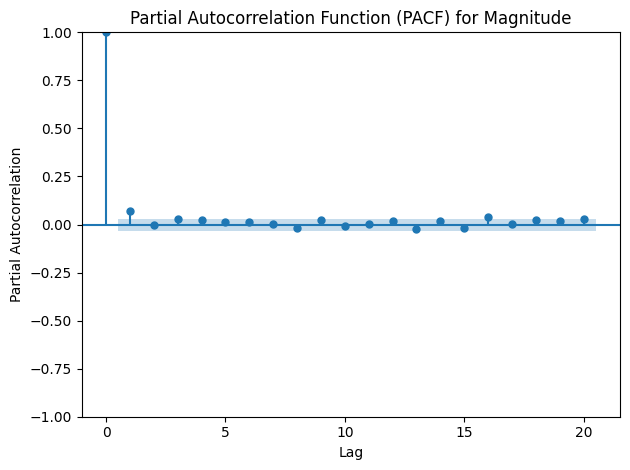

In [136]:
# Plot the partial autocorrelation function for the 'Magnitude' column
plot_pacf(df2['Magnitude'], lags=20, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) for Magnitude')

plt.tight_layout()
plt.show()

In [137]:
'''
'p' = order of AutoRegressive Term. It's the no. of lags to be used as predictors.
-> Select p as value which is farthest from the significance line.

-> For Latitude, p=1.
-> For Longitude, p=1.
-> For Magnitude, p=1.
'''

"\n'p' = order of AutoRegressive Term. It's the no. of lags to be used as predictors.\n-> Select p as value which is farthest from the significance line.\n\n-> For Latitude, p=1.\n-> For Longitude, p=1.\n-> For Magnitude, p=1.\n"

In [138]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming df2 is your DataFrame
# df2 should already be defined and populated with data

# Calculate the EMA for Magnitude
df2['5_EMA_Magnitude'] = df2['Magnitude'].ewm(span=5, adjust=False).mean()

# Splitting data into train and test sets
train_size = int(len(df2['Magnitude']) * 0.8)
train = df2['Magnitude'][:train_size]  # Define the training set
test = df2['Magnitude'][train_size:]   # Define the test set

# Fit the ARIMA model
model = ARIMA(train, order=(1, 0, 10))
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Calculate evaluation metrics for ARIMA model
mse_arima = mean_squared_error(test, forecast)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(test, forecast)

# Create a DataFrame with the ARIMA evaluation metrics
arima_evaluation_metrics = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Square Error (MSE)", "Root Mean Square Error (RMSE)"],
    "ARIMA": [mae_arima, mse_arima, rmse_arima]
}

# For EMA
ema_columns_magnitude = ['5_EMA_Magnitude']

# Define a dictionary to store EMA metrics
evaluation_metrics = {
    'Metric': ["Mean Absolute Error (MAE)", "Mean Square Error (MSE)", "Root Mean Square Error (RMSE)"]
}

def calculate_metrics(columns, target):
    for column in columns:
        mae = mean_absolute_error(df2[target], df2[column])
        mse = mean_squared_error(df2[target], df2[column])
        rmse = np.sqrt(mse)
        evaluation_metrics[column] = [mae, mse, rmse]

calculate_metrics(ema_columns_magnitude, 'Magnitude')

# Combine ARIMA and EMA metrics
combined_metrics = {
    "Metric": evaluation_metrics["Metric"],
    "ARIMA": arima_evaluation_metrics["ARIMA"],
    "5_EMA": evaluation_metrics[ema_columns_magnitude[0]]
}

# Create a DataFrame with the combined evaluation metrics
combined_df = pd.DataFrame(combined_metrics)

# Convert DataFrame to tabular format using tabulate for combined evaluation
tabulated_data_combined = tabulate(combined_df, headers='keys', tablefmt='fancy_grid')

# Display the tabulated data for combined evaluation
print("Combined ARIMA and EMA Evaluation Metrics:")
print(tabulated_data_combined)


Combined ARIMA and EMA Evaluation Metrics:
╒════╤═══════════════════════════════╤═══════════╤══════════╕
│    │ Metric                        │     ARIMA │    5_EMA │
╞════╪═══════════════════════════════╪═══════════╪══════════╡
│  0 │ Mean Absolute Error (MAE)     │ 0.221804  │ 0.169998 │
├────┼───────────────────────────────┼───────────┼──────────┤
│  1 │ Mean Square Error (MSE)       │ 0.0873204 │ 0.049364 │
├────┼───────────────────────────────┼───────────┼──────────┤
│  2 │ Root Mean Square Error (RMSE) │ 0.2955    │ 0.22218  │
╘════╧═══════════════════════════════╧═══════════╧══════════╛


In [139]:
import pandas as pd
from tabulate import tabulate

# Assuming df is your DataFrame

# Compute the EMA for each attribute with a window size of 5
df['5_EMA_Latitude'] = df['Latitude'].ewm(span=5, adjust=False).mean()
df['5_EMA_Longitude'] = df['Longitude'].ewm(span=5, adjust=False).mean()
df['5_EMA_Magnitude'] = df['Magnitude'].ewm(span=5, adjust=False).mean()

# Get the last values of the EMA series as the predicted values
predicted_latitude_ema = df['5_EMA_Latitude'].iloc[-1]
predicted_longitude_ema = df['5_EMA_Longitude'].iloc[-1]
predicted_magnitude_ema = df['5_EMA_Magnitude'].iloc[-1]

# Create a DataFrame with the predicted values
predictions_ema_df = pd.DataFrame({
    'Attribute': ['Latitude', 'Longitude', 'Magnitude'],
    'Predicted Value': [predicted_latitude_ema, predicted_longitude_ema, predicted_magnitude_ema]
})

# Convert DataFrame to tabular format using tabulate
tabulated_data_ema = tabulate(predictions_ema_df, headers='keys', tablefmt='fancy_grid')

# Display the tabulated data
print("EMA Model Predictions:")
print(tabulated_data_ema)


EMA Model Predictions:
╒════╤═════════════╤═══════════════════╕
│    │ Attribute   │   Predicted Value │
╞════╪═════════════╪═══════════════════╡
│  0 │ Latitude    │          34.0807  │
├────┼─────────────┼───────────────────┤
│  1 │ Longitude   │         136.601   │
├────┼─────────────┼───────────────────┤
│  2 │ Magnitude   │           4.50177 │
╘════╧═════════════╧═══════════════════╛


In [140]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Assuming df is your DataFrame

# Compute the EMA for each attribute with a window size of 5
df['5_EMA_Latitude'] = df['Latitude'].ewm(span=5, adjust=False).mean()
df['5_EMA_Longitude'] = df['Longitude'].ewm(span=5, adjust=False).mean()
df['5_EMA_Magnitude'] = df['Magnitude'].ewm(span=5, adjust=False).mean()

# Function to predict next n values using EMA
def predict_next_ema(series, span, n):
    ema = series.ewm(span=span, adjust=False).mean()
    last_ema = ema.iloc[-1]
    predictions = [last_ema]  # Start with the last known EMA
    alpha = 2 / (span + 1)

    for _ in range(n - 1):
        new_ema = alpha * series.iloc[-1] + (1 - alpha) * predictions[-1]
        predictions.append(new_ema)

    return predictions

# Predict the next 30 values for each attribute
predicted_latitude_ema = predict_next_ema(df['Latitude'], span=5, n=20)
predicted_longitude_ema = predict_next_ema(df['Longitude'], span=5, n=20)
predicted_magnitude_ema = predict_next_ema(df['Magnitude'], span=5, n=20)

# Create a DataFrame with the predicted values
predictions_ema_df = pd.DataFrame({
    'Predicted Latitude': predicted_latitude_ema,
    'Predicted Longitude': predicted_longitude_ema,
    'Predicted Magnitude': predicted_magnitude_ema
})

# Convert DataFrame to tabular format using tabulate
tabulated_data_ema = tabulate(predictions_ema_df, headers='keys', tablefmt='fancy_grid')

# Display the tabulated data
print("EMA Model Predictions for Next 20 Time-Stamps:")
print(tabulated_data_ema)


EMA Model Predictions for Next 20 Time-Stamps:
╒════╤══════════════════════╤═══════════════════════╤═══════════════════════╕
│    │   Predicted Latitude │   Predicted Longitude │   Predicted Magnitude │
╞════╪══════════════════════╪═══════════════════════╪═══════════════════════╡
│  0 │              34.0807 │               136.601 │               4.50177 │
├────┼──────────────────────┼───────────────────────┼───────────────────────┤
│  1 │              34.6148 │               137.812 │               4.46785 │
├────┼──────────────────────┼───────────────────────┼───────────────────────┤
│  2 │              34.9709 │               138.619 │               4.44523 │
├────┼──────────────────────┼───────────────────────┼───────────────────────┤
│  3 │              35.2082 │               139.158 │               4.43016 │
├────┼──────────────────────┼───────────────────────┼───────────────────────┤
│  4 │              35.3665 │               139.516 │               4.4201  │
├────┼───────────

In [143]:
import folium

# Create a folium map centered around the last known location
m = folium.Map(location=[predicted_latitude_ema[-1], predicted_longitude_ema[-1]], zoom_start=2)

# Add markers for each predicted location
for lat, lon, mag in zip(predicted_latitude_ema, predicted_longitude_ema, predicted_magnitude_ema):
    folium.Marker(
        location=[lat, lon],
        popup=f"Predicted Location: ({lat:.4f}, {lon:.4f})<br>Predicted Magnitude: {mag:.4f}",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map
display(m)


In [145]:
import folium

# Define the attribution for the tile providers
attribution = {
    'OpenStreetMap': '© OpenStreetMap contributors',
    'Stamen Terrain': 'Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.',
    'Stamen Toner': 'Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.',
    'Stamen Watercolor': 'Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.',
    'CartoDB positron': 'Map tiles by CartoDB, under CC BY 3.0. Data by OpenStreetMap, under ODbL.',
    'CartoDB dark_matter': 'Map tiles by CartoDB, under CC BY 3.0. Data by OpenStreetMap, under ODbL.'
}

# Choose the tile provider
tile_provider = 'CartoDB positron'

# Create a folium map centered around the last known location with English map tiles
m = folium.Map(
    location=[predicted_latitude_ema[-1], predicted_longitude_ema[-1]],
    zoom_start=2,
    tiles=tile_provider,
    attr=attribution[tile_provider]
)

# Add markers for each predicted location
for lat, lon, mag in zip(predicted_latitude_ema, predicted_longitude_ema, predicted_magnitude_ema):
    folium.Marker(
        location=[lat, lon],
        popup=f"Predicted Location: ({lat:.4f}, {lon:.4f})<br>Predicted Magnitude: {mag:.4f}",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map
display(m)